In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
feat_df = pd.read_csv("features_data_set.csv")
sale_df = pd.read_csv("sales_data_set.csv")
store_df = pd.read_csv("stores_data_set.csv")

## Surface-level view of data

In [4]:
feat_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
feat_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,8190.0,23.000000,12.987966,1.000,12.000000,23.000000,34.000000,45.000000
Temperature,8190.0,59.356198,18.678607,-7.290,45.902500,60.710000,73.880000,101.950000
Fuel_Price,8190.0,3.405992,0.431337,2.472,3.041000,3.513000,3.743000,4.468000
MarkDown1,4032.0,7032.371786,9262.747448,-2781.450,1577.532500,4743.580000,8923.310000,103184.980000
MarkDown2,2921.0,3384.176594,8793.583016,-265.760,68.880000,364.570000,2153.350000,104519.540000
MarkDown3,3613.0,1760.100180,11276.462208,-179.260,6.600000,36.260000,163.150000,149483.310000
MarkDown4,3464.0,3292.935886,6792.329861,0.220,304.687500,1176.425000,3310.007500,67474.850000
MarkDown5,4050.0,4132.216422,13086.690278,-185.170,1440.827500,2727.135000,4832.555000,771448.100000
CPI,7605.0,172.460809,39.738346,126.064,132.364839,182.764003,213.932412,228.976456
Unemployment,7605.0,7.826821,1.877259,3.684,6.634000,7.806000,8.567000,14.313000


In [7]:
sale_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


In [8]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [9]:
sale_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,421570.0,22.200546,12.785297,1.00,11.00,22.00,33.0000,45.00
Dept,421570.0,44.260317,30.492054,1.00,18.00,37.00,74.0000,99.00
Weekly_Sales,421570.0,15981.258123,22711.183519,-4988.94,2079.65,7612.03,20205.8525,693099.36


In [10]:
store_df.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [11]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [12]:
store_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,45.0,23.0,13.133926,1.0,12.0,23.0,34.0,45.0
Size,45.0,130287.6,63825.271991,34875.0,70713.0,126512.0,202307.0,219622.0


In [13]:
feat_df["Date"] = pd.to_datetime(feat_df["Date"], format="%d/%m/%Y")
sale_df["Date"] = pd.to_datetime(sale_df["Date"], format="%d/%m/%Y")

In [14]:
feat_df.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [15]:
sale_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [16]:
feat_df["Store"].value_counts().head(10)

Store
1     182
24    182
26    182
27    182
28    182
29    182
30    182
31    182
32    182
33    182
Name: count, dtype: int64

In [17]:
sale_df["Store"].value_counts().head(10)

Store
13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
34    10224
20    10214
6     10211
Name: count, dtype: int64

### Merge all three dataframes into one

In [18]:
df = pd.merge(sale_df, feat_df, on=["Store", "Date", "IsHoliday"])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [19]:
df.shape

(421570, 14)

In [20]:
df = pd.merge(df, store_df, on=["Store"], how="left")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [21]:
df["Month"] = df["Date"].apply(lambda x: x.month)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315,3


## Data cleaning and exploration

<Axes: >

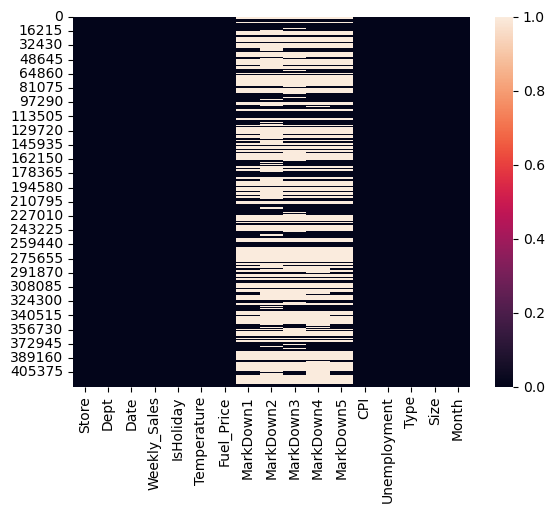

In [22]:
sns.heatmap(df.isnull())

In [23]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
Month                0
dtype: int64

In [24]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221,9
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221,10
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221,10
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221,10
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,B,118221,10


In [25]:
df = df.fillna(0)

In [26]:
df.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Month           0
dtype: int64

In [27]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,3


In [28]:
df.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Store,421570.0,22.200546,1.0,11.0,22.0,33.0,45.0,12.785297
Dept,421570.0,44.260317,1.0,18.0,37.0,74.0,99.0,30.492054
Date,421570,2011-06-18 08:30:31.963375104,2010-02-05 00:00:00,2010-10-08 00:00:00,2011-06-17 00:00:00,2012-02-24 00:00:00,2012-10-26 00:00:00,NaN
Weekly_Sales,421570.0,15981.258123,-4988.94,2079.65,7612.03,20205.8525,693099.36,22711.183519
Temperature,421570.0,60.090059,-2.06,46.68,62.09,74.28,100.14,18.447931
Fuel_Price,421570.0,3.361027,2.472,2.933,3.452,3.738,4.468,0.458515
MarkDown1,421570.0,2590.074819,0.0,0.0,0.0,2809.05,88646.76,6052.385934
MarkDown2,421570.0,879.974298,-265.76,0.0,0.0,2.2,104519.54,5084.538801
MarkDown3,421570.0,468.087665,-29.1,0.0,0.0,4.54,141630.61,5528.873453
MarkDown4,421570.0,1083.132268,0.0,0.0,0.0,425.29,67474.85,3894.529945


In [29]:
df.duplicated().sum()

0

In [30]:
df["Type"].value_counts()

Type
A    215478
B    163495
C     42597
Name: count, dtype: int64

In [31]:
df["IsHoliday"] = df["IsHoliday"].astype(int)
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month
0,1,1,2010-02-05,24924.50,0,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2
1,1,1,2010-02-12,46039.49,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2
2,1,1,2010-02-19,41595.55,0,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2
3,1,1,2010-02-26,19403.54,0,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2
4,1,1,2010-03-05,21827.90,0,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,3


## EDA

In [32]:
result = pd.pivot_table(df, index=["Date", "Store", "Dept"], columns=["Type"], values="Weekly_Sales", aggfunc=np.mean)
result

/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_20855/3975950139.py:1: FutureWarning: The provided callable <function mean at 0x118000360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result = pd.pivot_table(df, index=["Date", "Store", "Dept"], columns=["Type"], values="Weekly_Sales", aggfunc=np.mean)


Type                          A         B   C
Date       Store Dept                        
2010-02-05 1     1     24924.50       NaN NaN
                 2     50605.27       NaN NaN
                 3     13740.12       NaN NaN
                 4     39954.04       NaN NaN
                 5     32229.38       NaN NaN
...                         ...       ...  ..
2012-10-26 45    93         NaN   2487.80 NaN
                 94         NaN   5203.31 NaN
                 95         NaN  56017.47 NaN
                 97         NaN   6817.48 NaN
                 98         NaN   1076.80 NaN

[421570 rows x 3 columns]

In [33]:
result.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,215478.0,20099.568043,26423.457227,-4988.94,3315.090,10105.17,26357.18,474330.10
B,163495.0,12237.075977,17203.668989,-3924.00,1927.055,6187.87,15353.74,693099.36
C,42597.0,9519.532538,15985.351612,-379.00,131.990,1149.67,12695.01,112152.35


In [34]:
result_md = pd.pivot_table(df, values=[f"MarkDown{i}" for i in range(1, 6)], columns=["IsHoliday"], index=["Date", "Store", "Dept"], aggfunc=np.mean)
result_md

/var/folders/8v/jv_ccv7x6bb679_h5m_hgz0h0000gn/T/ipykernel_20855/999710251.py:1: FutureWarning: The provided callable <function mean at 0x118000360> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  result_md = pd.pivot_table(df, values=[f"MarkDown{i}" for i in range(1, 6)], columns=["IsHoliday"], index=["Date", "Store", "Dept"], aggfunc=np.mean)


MarkDown1     MarkDown2     MarkDown3     MarkDown4      \
IsHoliday                     0   1         0   1         0   1         0   1   
Date       Store Dept                                                           
2010-02-05 1     1         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 2         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 3         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 4         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
                 5         0.00 NaN      0.00 NaN       0.0 NaN      0.00 NaN   
...                         ...  ..       ...  ..       ...  ..       ...  ..   
2012-10-26 45    93     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 94     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 95     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 97     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   
                 98     4018.91 NaN     58.08 NaN     100.0 NaN    211.94 NaN   

                      MarkDown5      
IsHoliday                     0   1  
Date       Store Dept                
2010-02-05 1     1         0.00 NaN  
                 2         0.00 NaN  
                 3         0.00 NaN  
                 4         0.00 NaN  
                 5         0.00 NaN  
...                         ...  ..  
2012-10-26 45    93      858.33 NaN  
                 94      858.33 NaN  
                 95      858.33 NaN  
                 97      858.33 NaN  
                 98      858.33 NaN  

[421570 rows x 10 columns]

In [35]:
result_md.describe().transpose()

count         mean           std     min  25%  50%  \
          IsHoliday                                                          
MarkDown1 0          391909.0  2595.936803   6123.402037    0.00  0.0  0.0   
          1           29661.0  2512.620778   5020.047408    0.00  0.0  0.0   
MarkDown2 0          391909.0   589.580546   2984.163111 -265.76  0.0  0.0   
          1           29661.0  4716.929394  15295.329993   -9.98  0.0  0.0   
MarkDown3 0          391909.0    62.778142    630.704594  -29.10  0.0  0.0   
          1           29661.0  5823.417900  19959.302249    0.00  0.0  0.0   
MarkDown4 0          391909.0  1070.741151   3921.553070    0.00  0.0  0.0   
          1           29661.0  1246.855336   3513.998030    0.00  0.0  0.0   
MarkDown5 0          391909.0  1680.408001   4312.031598    0.00  0.0  0.0   
          1           29661.0  1429.754053   2427.638027    0.00  0.0  0.0   

                         75%        max  
          IsHoliday                      
MarkDown1 0          2826.57   88646.76  
          1          2463.16   36778.65  
MarkDown2 0             0.50   45971.43  
          1            65.00  104519.54  
MarkDown3 0             3.84   25959.98  
          1            66.08  141630.61  
MarkDown4 0           442.39   67474.85  
          1           319.19   29483.81  
MarkDown5 0          2182.32  108519.28  
          1          2069.30   11100.55

#### Seems like MD2 and 3 both change by a subtantial amount on a holidat compared to when there is none.

<Axes: >

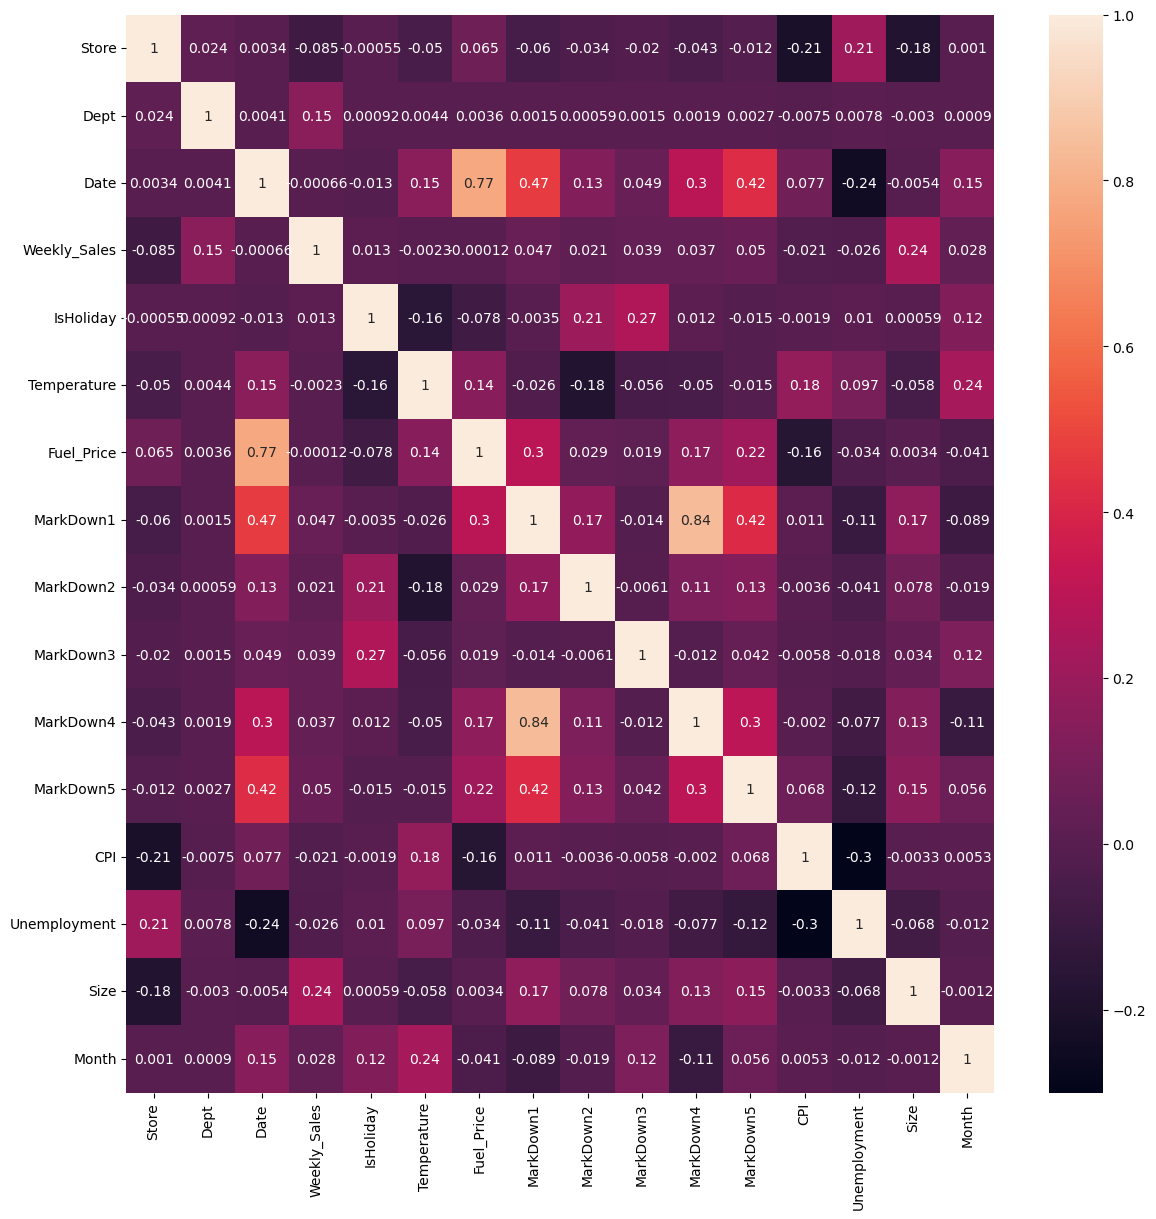

In [36]:
plt.figure(figsize=(14, 14))
sns.heatmap(df.drop("Type", axis=1).corr(), annot=True)

#### Seems like MD1 and 4 have the highest correlation.

## Data Visualization

<Axes: >

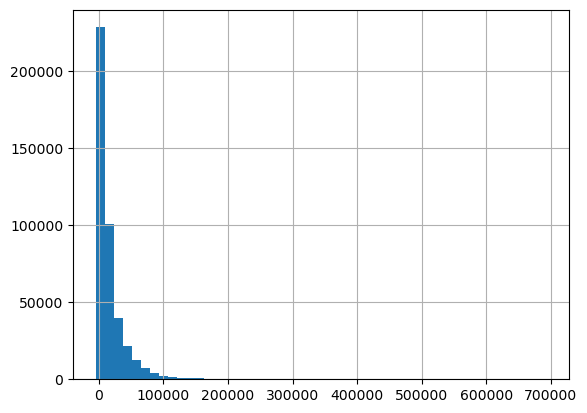

In [37]:
df["Weekly_Sales"].hist(bins=50)

In [38]:
type_df = df.groupby("Type").mean()
type_df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month
Type,,,,,,,,,,,,,,,,
A,21.736419,44.622156,2011-06-17 15:46:40.868766208,20099.568043,0.070471,60.531945,3.343999,3102.403194,1083.216159,549.644930,1325.891281,2147.830168,174.408895,7.791595,182231.285486,6.449628
B,18.450417,43.112273,2011-06-18 02:17:20.222636800,12237.075977,0.070412,57.562951,3.382523,2553.465968,827.500452,481.215226,1043.927675,1324.921913,167.176656,7.928836,101818.735827,6.449586
C,38.942015,46.836350,2011-06-22 21:00:56.032114944,9519.532538,0.069582,67.554266,3.364654,138.960203,53.274338,5.142226,5.603993,505.826631,170.429314,8.934350,40535.725286,6.448623


<Axes: xlabel='Type', ylabel='Weekly_Sales'>

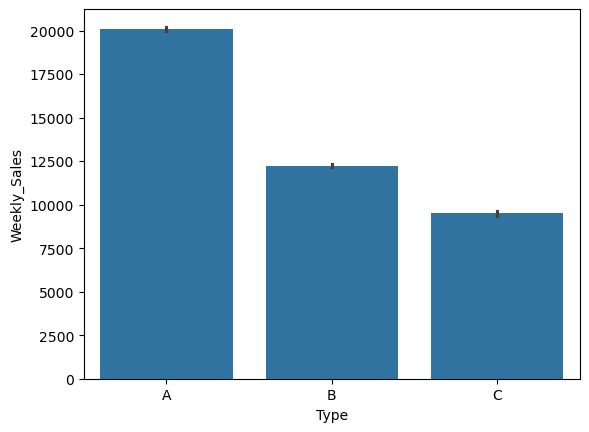

In [39]:
sns.barplot(df, x="Type", y="Weekly_Sales")

In [41]:
dept_df = df.drop("Type", axis=1).groupby("Dept").mean()
dept_df

,Store,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Month
Dept,,,,,,,,,,,,,,,
1,23.000000,2011-06-17 00:00:00.000000000,19213.485088,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
2,23.000000,2011-06-17 00:00:00.000000000,43607.020113,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
3,23.000000,2011-06-17 00:00:00.000000000,11793.698516,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
4,23.000000,2011-06-17 00:00:00.000000000,25974.630238,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
5,22.757366,2011-06-20 18:58:28.681266688,21365.583515,0.069797,60.559367,3.365397,2462.697233,830.226332,435.134596,1022.858240,1603.738276,171.109374,7.978057,131530.357964,6.455018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23.000000,2011-06-17 00:00:00.000000000,69824.423080,0.069930,60.663782,3.358607,2429.019322,818.872810,429.184037,1008.870435,1581.806813,171.578394,7.999151,130287.600000,6.447552
96,23.258138,2011-06-29 17:51:14.907292928,15210.942761,0.069839,61.539285,3.359920,2362.845647,820.762363,397.214137,999.452087,1660.599345,171.562686,7.849295,129282.010507,6.458385
97,23.357439,2011-06-17 12:49:05.141764864,14255.576919,0.069767,60.490781,3.362418,2463.638764,833.096524,432.439341,1025.957821,1591.276367,170.445933,8.043564,130676.377190,6.450781


<Axes: ylabel='Dept'>

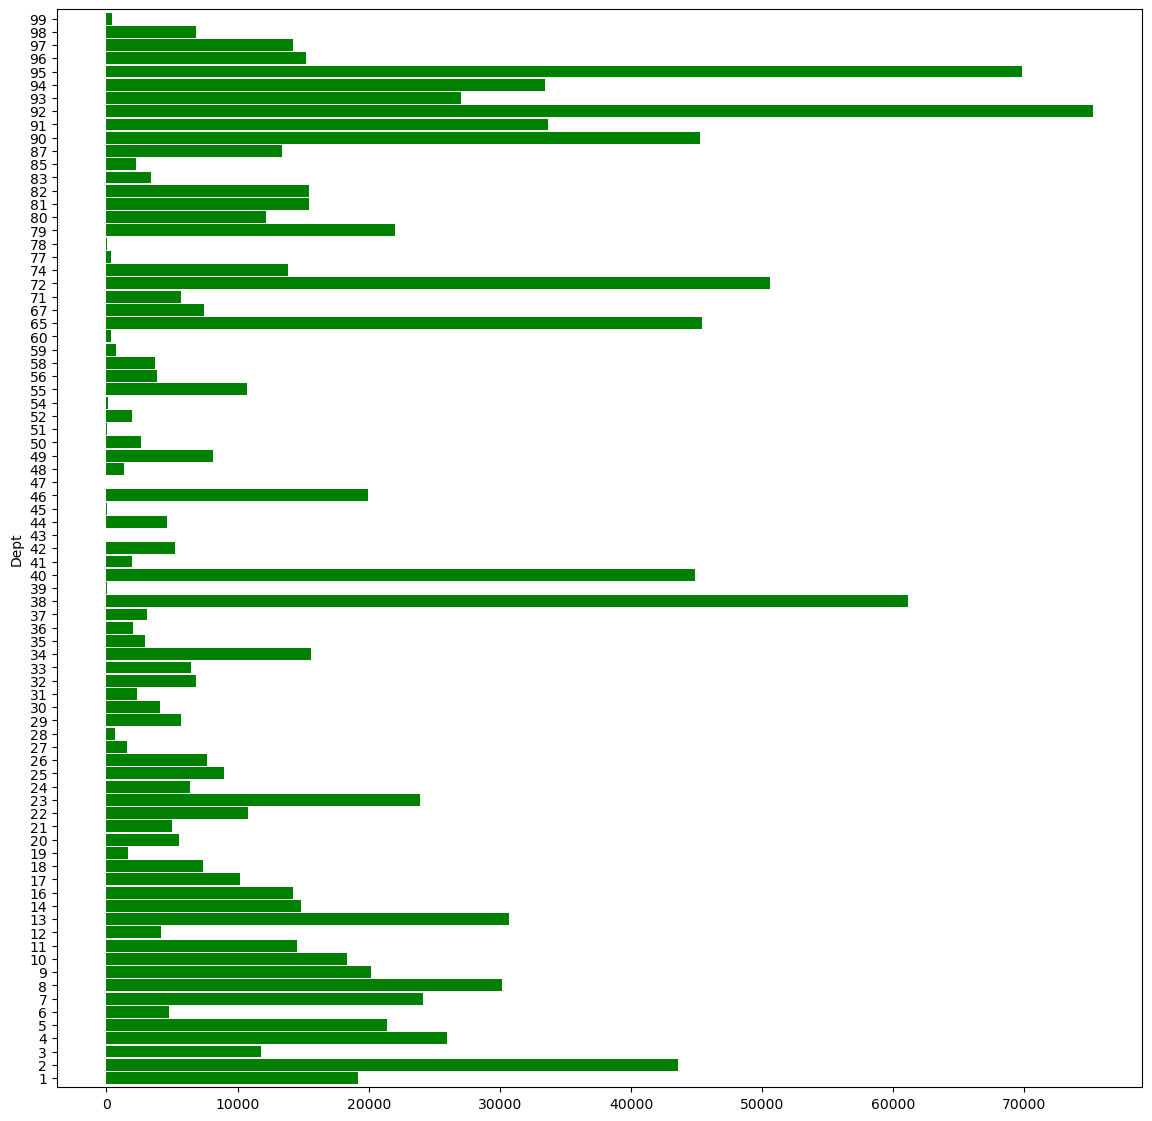

In [153]:
dept_df["Weekly_Sales"].plot(kind="barh", figsize=(14, 14), width=0.9, color="green")

<Axes: ylabel='Dept'>

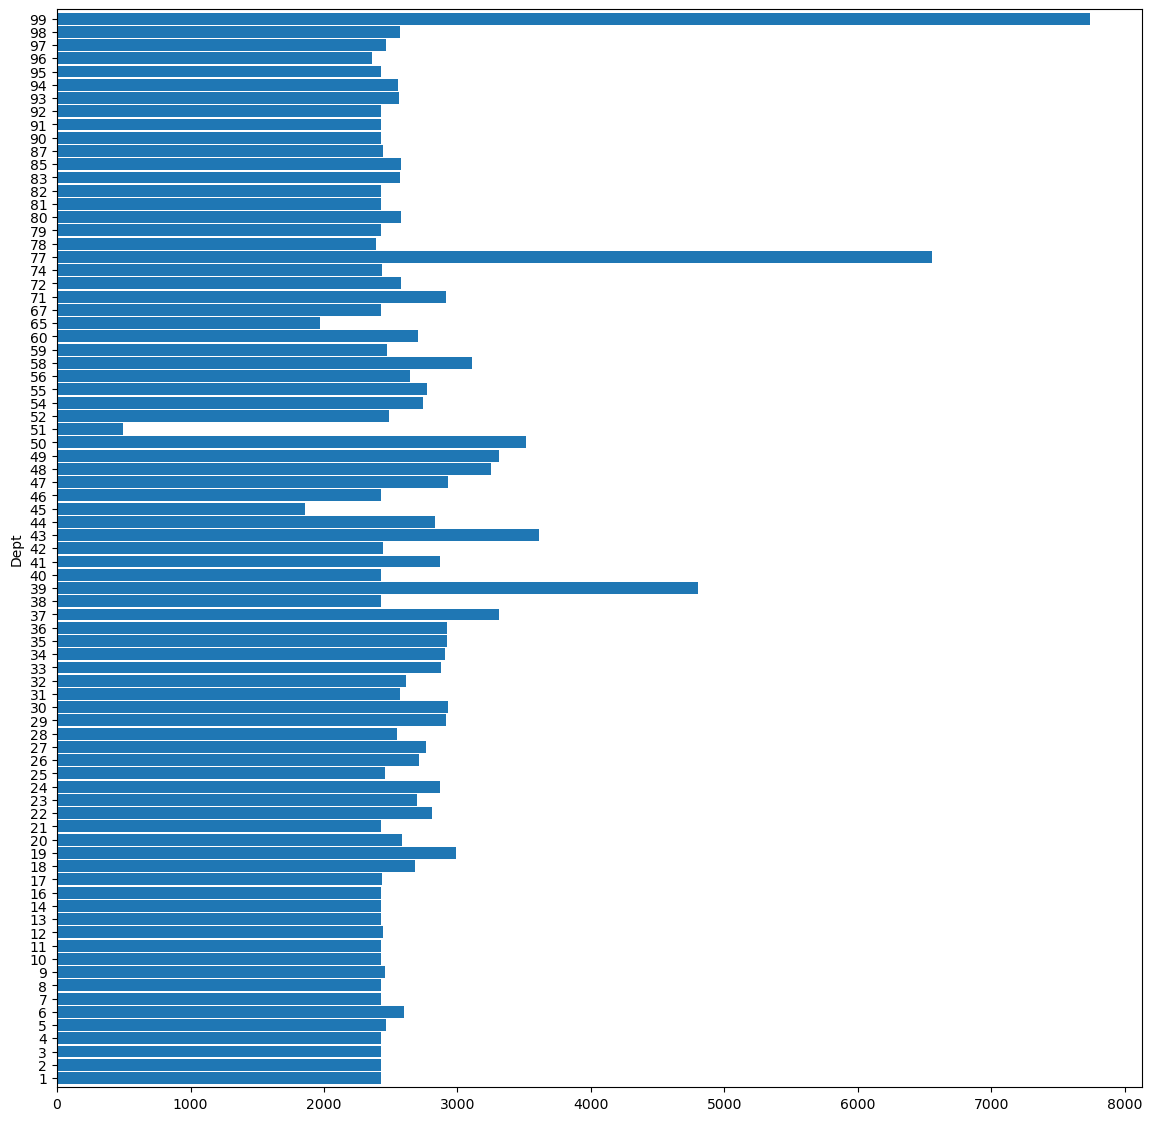

In [150]:
dept_df["MarkDown1"].plot(kind="barh", figsize=(14, 14), width=0.9)

<Axes: ylabel='Dept'>

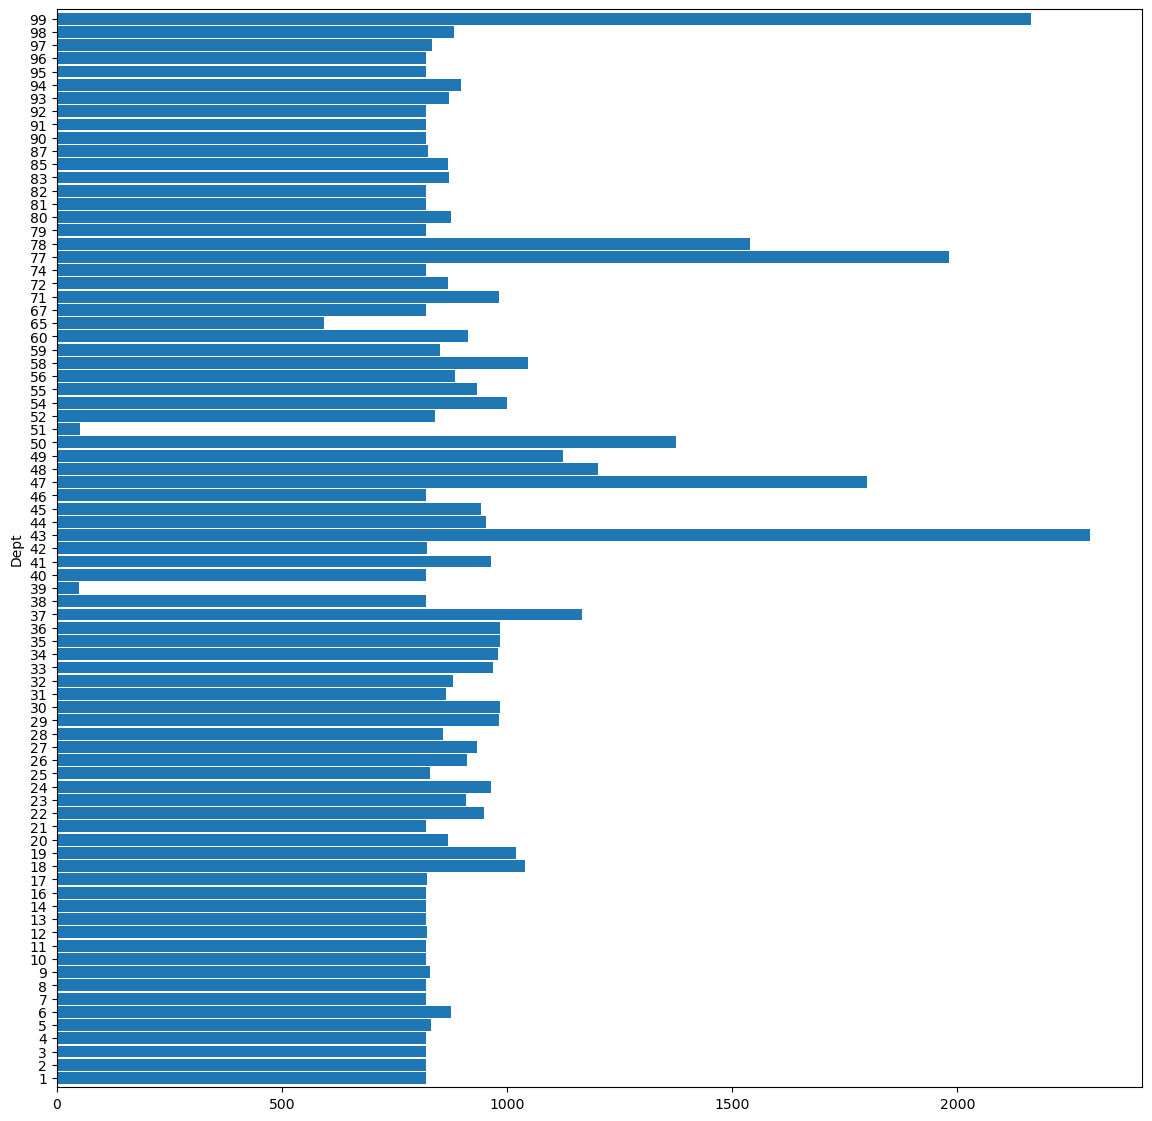

In [149]:
dept_df["MarkDown2"].plot(kind="barh", figsize=(14, 14), width=0.9)

<Axes: ylabel='Dept'>

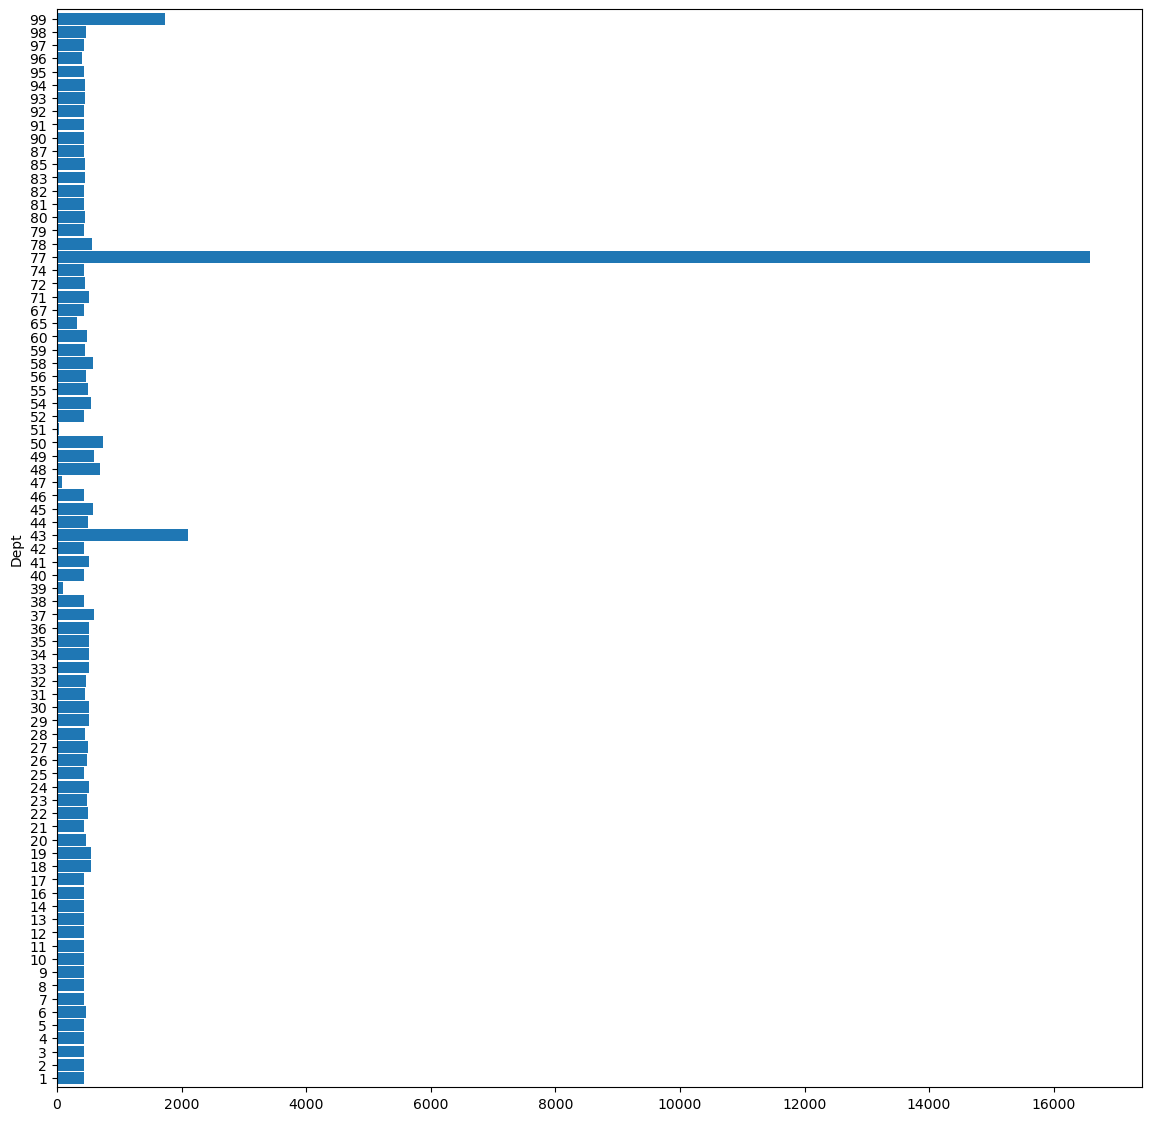

In [148]:
dept_df["MarkDown3"].plot(kind="barh", figsize=(14, 14), width=0.9)

<Axes: ylabel='Dept'>

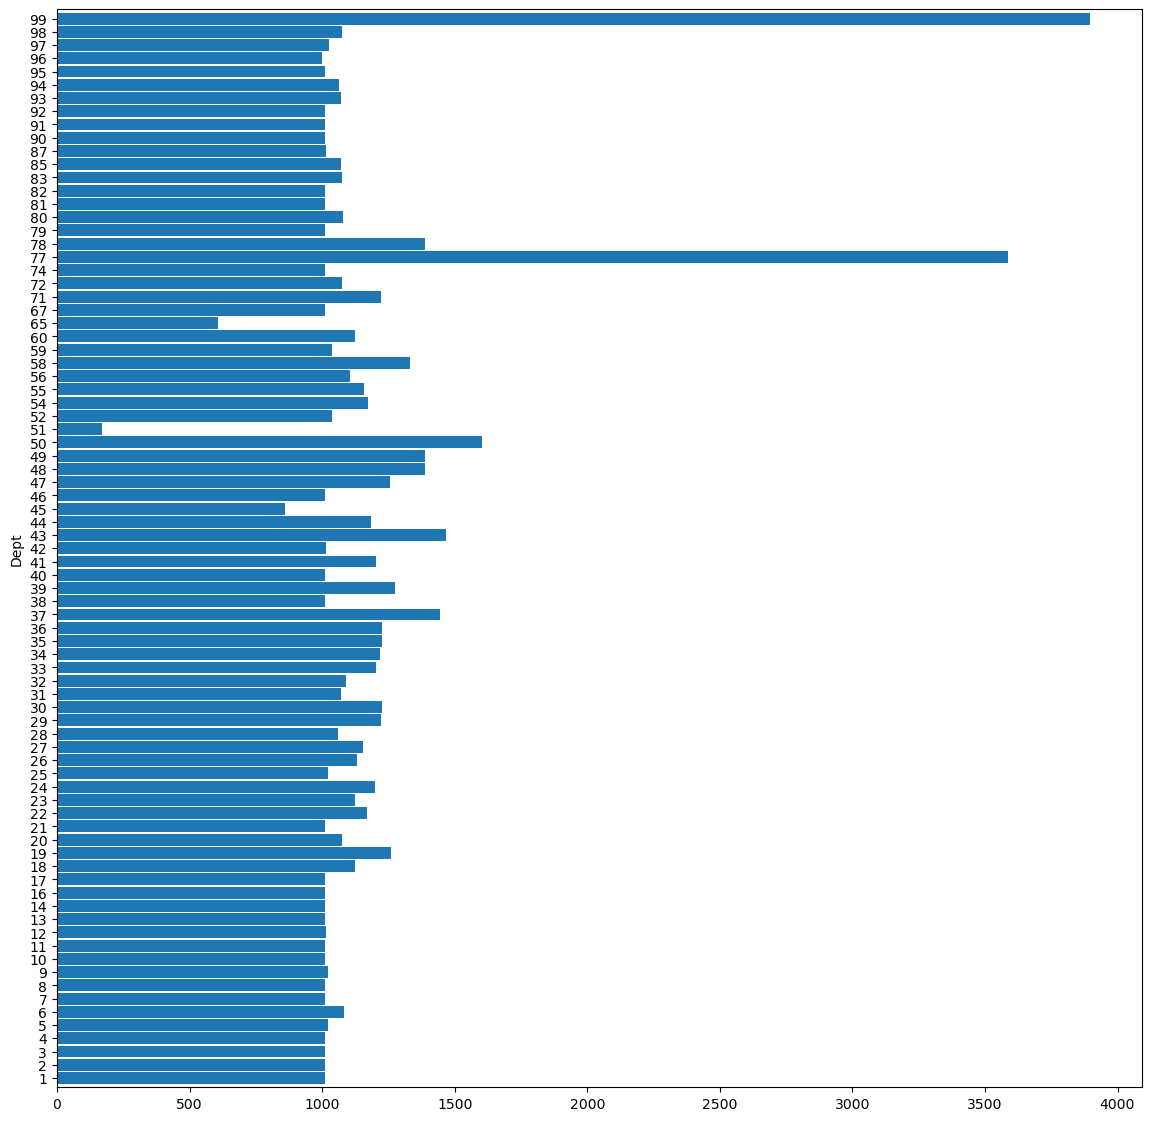

In [146]:
dept_df["MarkDown4"].plot(kind="barh", figsize=(14, 14), width=0.9)

<Axes: ylabel='Dept'>

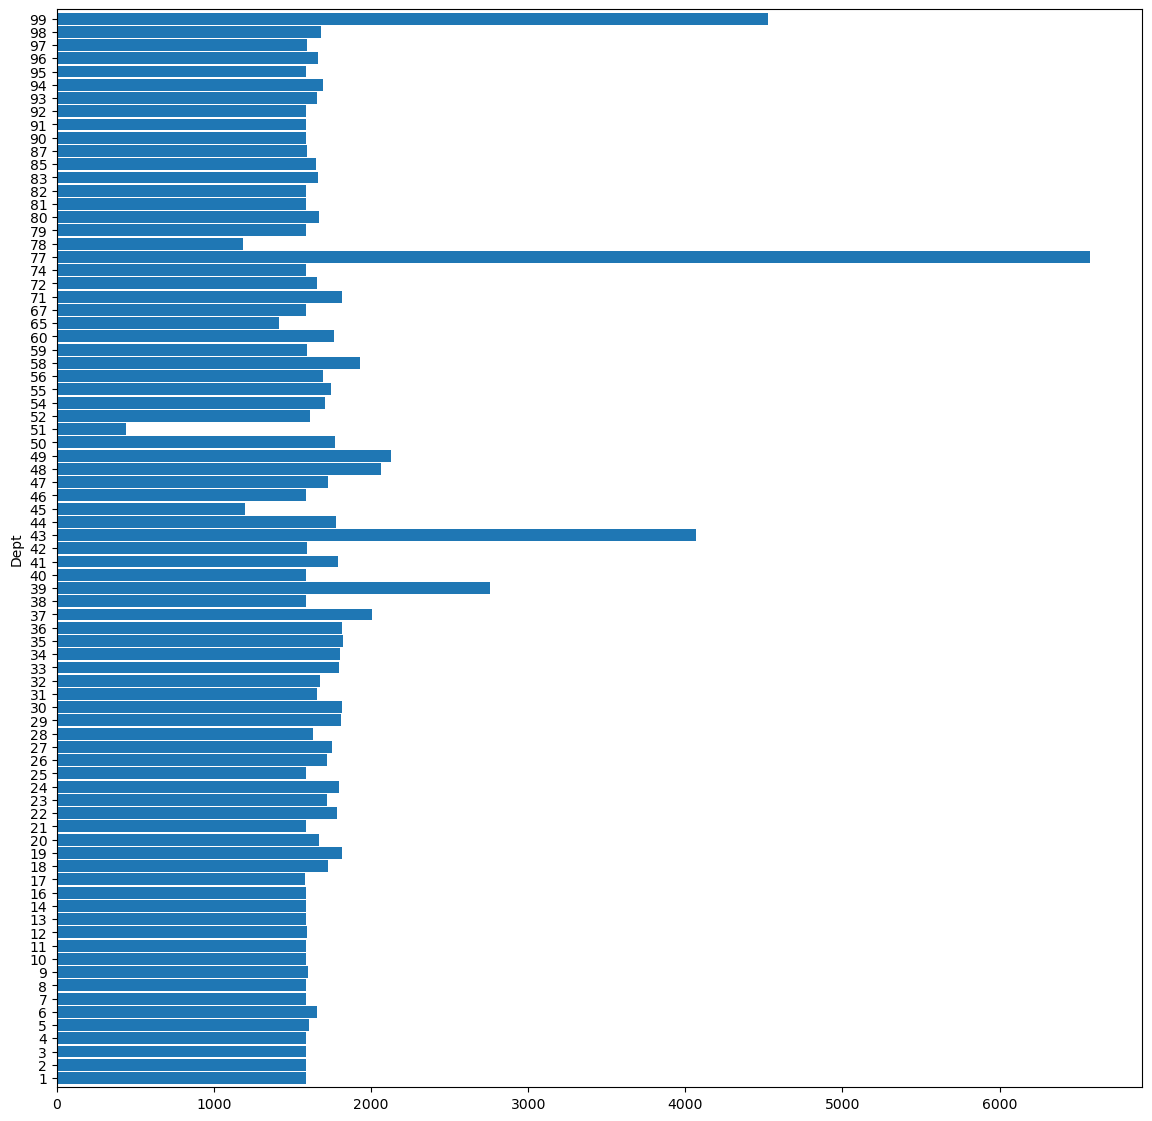

In [147]:
dept_df["MarkDown5"].plot(kind="barh", figsize=(14, 14), width=0.9)

#### There is a pattern where the departments with the lowest weekly sales have the highest markdown values, for example, Dept 77.

In [67]:
dept_sale_df = dept_df.sort_values("Weekly_Sales")
dept_sale_df["Weekly_Sales"][:30]

Dept
47      -7.682554
43       1.193333
78       7.296638
39      11.123750
51      21.931729
45      23.211586
54     108.305985
77     328.961800
60     347.370229
99     415.487065
28     618.085116
59     694.463564
48    1344.893576
27    1583.437727
19    1654.815030
52    1928.356252
41    1965.559998
36    2022.571061
85    2264.359407
31    2339.440287
50    2658.897010
35    2921.044946
37    3111.076193
83    3383.349838
58    3702.907419
56    3833.706211
30    4118.197208
12    4175.397021
44    4651.729658
6     4747.856188
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='MarkDown1', ylabel='MarkDown4'>

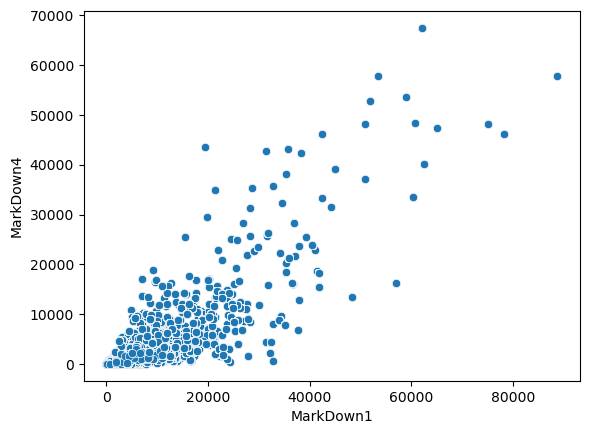

In [68]:
sns.scatterplot(df, x="MarkDown1", y="MarkDown4")

#### Visualizing the high positive correlation between MD1 and 4.

<Axes: xlabel='MarkDown1', ylabel='MarkDown5'>

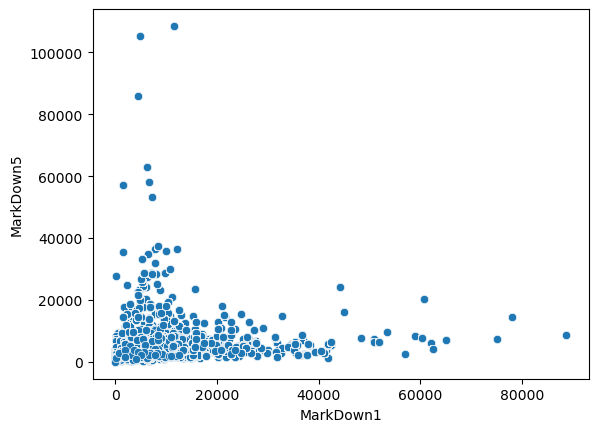

In [69]:
sns.scatterplot(df, x="MarkDown1", y="MarkDown5")

## Preprocessing

In [80]:
target = df["Weekly_Sales"]
df_final = df.drop(["Weekly_Sales", "Date"], axis=1)

In [81]:
df_final = pd.get_dummies(df_final, columns=["Type", "Store", "Dept"], drop_first=True)
df_final

,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Dept_90,Dept_91,Dept_92,Dept_93,Dept_94,Dept_95,Dept_96,Dept_97,Dept_98,Dept_99
0,0,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,...,False,False,False,False,False,False,False,False,False,False
1,1,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,...,False,False,False,False,False,False,False,False,False,False
2,0,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,...,False,False,False,False,False,False,False,False,False,False
3,0,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,...,False,False,False,False,False,False,False,False,False,False
4,0,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,0,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,...,False,False,False,False,False,False,False,False,True,False
421566,0,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,...,False,False,False,False,False,False,False,False,True,False
421567,0,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,...,False,False,False,False,False,False,False,False,True,False
421568,0,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,...,False,False,False,False,False,False,False,False,True,False


In [82]:
df_final.shape

(421570, 138)

In [83]:
target.shape

(421570,)

In [99]:
X = np.array(df_final).astype("float32")
y = np.array(target).astype("float32")

In [87]:
X.shape

(421570, 138)

In [89]:
y = y.reshape(-1, 1)
y.shape

(421570, 1)

In [91]:
from sklearn.model_selection import train_test_split

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [90]:
from sklearn.preprocessing import StandardScaler

#### No need to scale values if using XGBoost

In [93]:
# ssx = StandardScaler()
# X_train = ssx.fit_transform(X_train)
# X_test = ssx.transform(X_test)

In [94]:
# ssy = StandardScaler()
# y_train = ssx.fit_transform(y_train)
# y_test = ssx.transform(y_test)

In [101]:
X_train

array([[ 0.   , 64.8  ,  2.633, ...,  0.   ,  0.   ,  0.   ],
       [ 1.   , 67.41 ,  3.596, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 41.18 ,  3.513, ...,  0.   ,  0.   ,  0.   ],
       ...,
       [ 0.   , 53.15 ,  2.921, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 67.43 ,  3.916, ...,  0.   ,  0.   ,  0.   ],
       [ 0.   , 51.74 ,  3.567, ...,  0.   ,  0.   ,  0.   ]],
      dtype=float32)

## Train XGBoost Regressor

In [96]:
from xgboost import XGBRegressor

In [122]:
model = XGBRegressor(objective="reg:squarederror", learning_rate=0.1, max_depth=6, n_estimators=100)

In [123]:
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [124]:
model.score(X_test, y_test)

0.8489402532577515

In [125]:
pred = model.predict(X_test)

In [126]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [127]:
k = X_test.shape[1]
n = len(X_test)

In [137]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("MAE:", (mean_absolute_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("R2:", r2)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print("Adjusted R2", adj_r2)

RMSE: 8923.398
MAE: 5781.743
R2: 0.8489402532577515
Adjusted R2 0.8482780262159004


### Retrain with updated hyperparameters

In [133]:
new_xgbreg = XGBRegressor(objective="reg:linear",
                          max_depth=25,
                          colsample_bytree=0.3913546819101119,
                          alpha=1.0994354985124635,
                          eta=0.23848185159806115,
                          num_round=237)

In [134]:
new_xgbreg.fit(X_train, y_train)

[22:28:22] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
[22:28:22] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_d9k8pmaj4_/croot/xgboost-split_1724073758172/work/src/learner.cc:740: 
Parameters: { "num_round" } are not used.



XGBRegressor(alpha=1.0994354985124635, base_score=None, booster=None,
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3913546819101119, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eta=0.23848185159806115, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=25, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None, ...)

In [136]:
new_xgbreg.score(X_test, y_test)

0.9599141478538513

#### A lot better than previous score

In [138]:
new_pred = new_xgbreg.predict(X_test)

In [139]:
print("RMSE:", np.sqrt(mean_squared_error(y_test, new_pred)))
print("MAE:", (mean_absolute_error(y_test, new_pred)))
r2 = r2_score(y_test, new_pred)
print("R2:", r2)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)
print("Adjusted R2", adj_r2)

RMSE: 4596.755
MAE: 1871.1115
R2: 0.9599141478538513
Adjusted R2 0.9597384164902067
